Sinais e Sistemas 2

The Shape of the Room

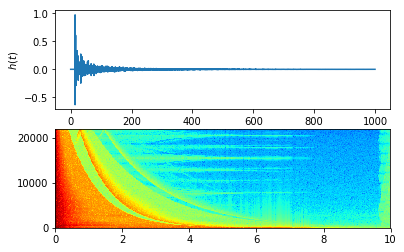

In [4]:
from numpy import *
from matplotlib.pyplot import *
from scipy import io

# Resposta ao Impulso - Sala de Aula
mat = io.loadmat('BC-329.mat')
fs  = mat.get('fs')        # Frequencia de amostragem
h1  = array(mat.get('h'))  # Room impulse response

n1  = arange(0, fs);

# Plots
subplot(2, 1, 1)
plot(n1/double(fs)*1e3, h1[n1])
ylabel('$h(t)$')

subplot(2, 1, 2)
specgram(h1[:,0], NFFT=1024, Fs = int(fs), noverlap=4, cmap='jet');

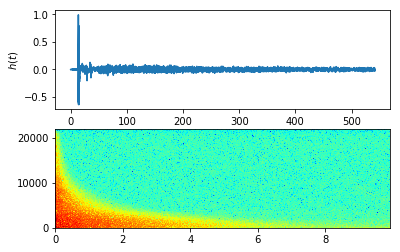

In [5]:
# Resposta ao Impulso - Catedral
mat  = io.loadmat('Cathedral.mat')
fs   = mat.get('fs')        # Frequencia de amostragem
h2   = array(mat.get('h'))  # Room impulse response

n5   = arange(0, 5*fs);

# Plots
subplot(2, 1, 1)
plot(n5/double(fs)*1e3, h2[n5])
ylabel('$h(t)$')

subplot(2, 1, 2)
specgram(h2[:,0], NFFT=1024, Fs = int(fs), noverlap=4, cmap='jet');

In [6]:
from IPython.display import Audio

Audio(h1[0:3*int(fs),0], rate=int(fs)) # Sala BC329 - áudio da resposta ao impulso (3s)

In [7]:
Audio(h2[0:3*int(fs),0],rate=int(fs)) # Catedral - áudio da resposta ao impulso (3s)

In [8]:
# Sinal de Voz
mat = io.loadmat('Dry.mat')
fs  = mat.get('fs')       # Frequencia de amostragem
y  = array(mat.get('y'))

Audio(y[:,0],rate=int(fs))

In [9]:
# Convolucao
y_room = convolve(y[:,0], h1[:,0])
y_cathedral = convolve(y[:,0], h2[:,0])

In [10]:
Audio(y_room[0:5*int(fs)],rate=int(fs))

In [11]:
Audio(y_cathedral[0:5*int(fs)],rate=int(fs))

In [12]:
# Música
from scipy.io import wavfile
fs, paga = wavfile.read('paganini.wav')

Audio(paga, rate=int(fs))

In [13]:
# Convolucao
paga_room = convolve(paga, h1[:,0])
paga_cathedral = convolve(paga, h2[:,0])

In [14]:
Audio(paga_room[0:5*int(fs)], rate=int(fs))

In [15]:
Audio(paga_cathedral[0:5*int(fs)], rate=int(fs))